In [1]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta=0.001, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []

    def fit(self, X, y):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        w = np.zeros(X.shape[1])
        for _ in range(self.n_epochs):
            for i in range(X.shape[0]):
                w_1 = w.copy()
                w_1[0] = w[0] + self.eta * (y[i] - w@X[i, :])
                for j in range(1, X.shape[1]):
                    w_1[j] = w[j] + self.eta*(y[i] - w@X[i, :]) * X[i, j]
                w = w_1.copy()

                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, X.dot(w)))
        self.w_ = self.weights_[np.argmin(self.mse_)]
        return self
    
    def predict(self, X):
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        return X.dot(self.w_)

In [3]:
df = pd.read_csv('data/weights_heights.csv').drop('Index', axis=1)
df

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


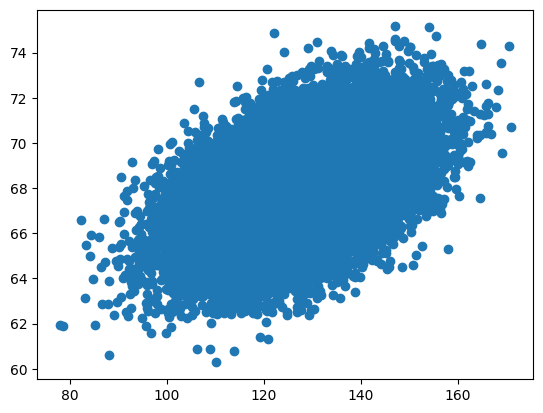

In [4]:
plt.scatter(x='Weight', y='Height', data=df);

In [5]:
X, y = df['Weight'].values, df['Height'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_test_scaled = scaler.transform(X_test.reshape([-1, 1]))

In [8]:
sgd = SGDRegressor()
sgd.fit(X_train_scaled, y_train)

SGDRegressor()

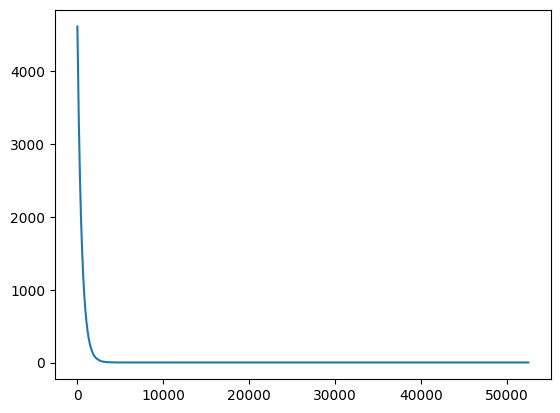

In [9]:
plt.plot(list(range(1, len(sgd.mse_) + 1)), sgd.mse_)

In [10]:
np.min(sgd.mse_), sgd.w_

(2.7151352406643623, array([67.9898497 ,  0.94447605]))

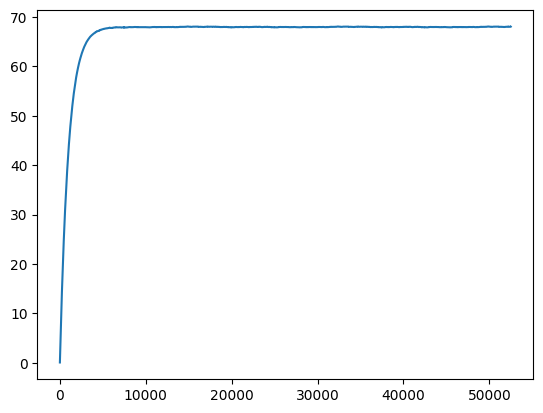

In [11]:
plt.plot(range(len(sgd.weights_)), [w[0] for w in sgd.weights_])

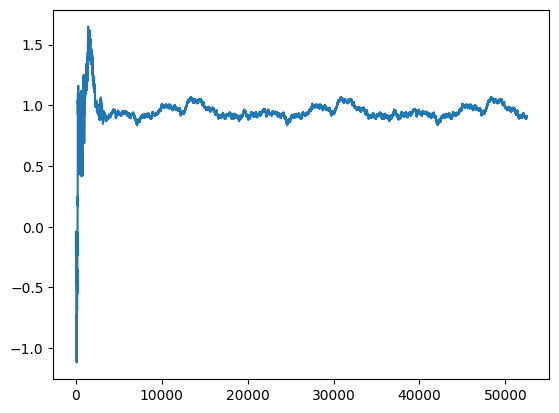

In [12]:
plt.plot(range(len(sgd.weights_)), [w[1] for w in sgd.weights_])

In [13]:
sgd_holdout_mse = mean_squared_error(y_test, sgd.predict(X_test_scaled))

In [14]:
lin_reg = LinearRegression()

In [15]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
linreg_holdout_mse = mean_squared_error(y_test, lin_reg.predict(X_test_scaled))

In [17]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print("Correct!")
except AssertionError:
    print(
        "Something's not good.\n Linreg's holdout MSE: {}"
        "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, sgd_holdout_mse)
    )

Correct!
